# Comparison of EUC/TC structure at 140W, 0N to TAO data

In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.04/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/g/data1/v45/cosima-cookbook/'", use "location=None" instead.
  app.launch_new_instance()


In [3]:
#configuration = 'mom01v5'
configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['mom025_jra_ryf0304',
 'mom025_jra_ryf8485',
 'mom025_jra_ryf9091',
 'mom025_jra_ryf9091_saltunderice',
 'mom025_nyf',
 'mom025_nyf_salt']

In [218]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf8485'
expt = 'KDS75_newbathy_JRA' 

In [219]:
temp = cc.get_nc_variable(expt, ncfile, 'temp',
                        chunks={'st_ocean': None}, n=9,
                        time_units="days since 1900-01-01")

u = cc.get_nc_variable(expt, ncfile, 'u',
                        chunks={'st_ocean': None}, n=9,
                        time_units="days since 1900-01-01")

In [220]:
# Extract 140W, 0N:
temp_140w0n = temp.sel(st_ocean=slice(0,300)).sel(yt_ocean=0.,method='nearest').sel(xt_ocean=-140.,method='nearest')
u_140w0n = u.sel(st_ocean=slice(0,300)).sel(yu_ocean=0.,method='nearest').sel(xu_ocean=-140.,method='nearest')
dep = u_140w0n.st_ocean

In [221]:
# Get TAO data:
obs_file_temp = xr.open_dataset('/g/data/e14/rmh561/TAO/t0n140w_dy.cdf')
obs_temp = obs_file_temp['T_20'].isel(lon=0).isel(lat=0).sel(depth=slice(0,300))
obs_temp = obs_temp.where(obs_temp!=1.e35)
count = np.count_nonzero(~np.isnan(obs_temp), axis=0)
obs_temp = obs_temp.isel(depth=count>=5000) # Only average if more than x observations at given depth
obs_file_u = xr.open_dataset('/g/data/e14/rmh561/TAO/adcp0n140w_dy.cdf')
obs_u = obs_file_u['u_1205'].isel(lon=0).isel(lat=0).sel(depth=slice(0,300))/100.
obs_u = obs_u.where(abs(obs_u)<=100.)
count = np.count_nonzero(~np.isnan(obs_u), axis=0)
obs_u = obs_u.isel(depth=count>=5000)  # Only average if more than x observations at given depth

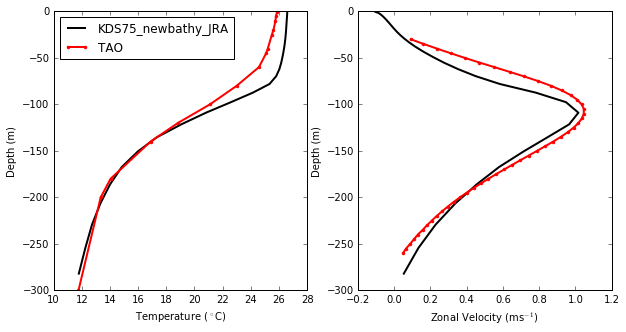

In [222]:
# Plot Annual mean:
f = plt.figure(figsize=(10,5),facecolor='white')
ax1 = plt.subplot(1,2,1);
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Depth (m)')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Zonal Velocity (ms$^{-1}$)')
ax2.set_ylabel('Depth (m)')
ax1.plot(temp_140w0n.mean('time'),-dep,'-k',label=expt,linewidth=2)
ax1.plot(obs_temp.mean('time'),-obs_temp.depth,'.-r',linewidth=2,label='TAO')
ax2.plot(u_140w0n.mean('time'),-dep,'-k',label=expt,linewidth=2)
ax2.plot(obs_u.mean('time'),-obs_u.depth,'.-r',linewidth=2)
ax1.legend(loc=2)